In [1]:
import tensorflow as tf
import os

In [2]:
os.path.join('train', 'train')

'train\\train'

In [5]:
os.listdir('train')

['cats', 'dogs']

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus
#for gpu in gpus:
    #tf.config.experimental.set_memory_growth(gpu, True)

[]

In [9]:
import cv2
import PIL
import imghdr
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ugind\AppData\Local\Temp\ipykernel_12928\1683422077.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
data_dir = 'train'

In [13]:
image_exts = ['jpg']

In [15]:
##os.listdir(os.path.join(data_dir, 'dogs'))

In [17]:
img_path = os.path.join(os.path.join(data_dir, 'dogs'), 'dog.1.jpg')
img_data = cv2.imread(img_path)
type(img_data)
img_data.shape

(499, 327, 3)

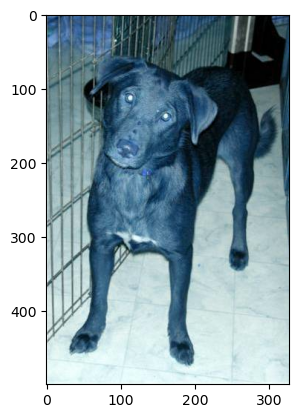

In [19]:
plt.imshow(img_data)
plt.show()

In [21]:
data = tf.keras.utils.image_dataset_from_directory('train')

Found 25000 files belonging to 2 classes.


In [20]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [52]:
data??

Type:           _PrefetchDataset
String form:    <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Length:         782
File:           c:\users\ugind\anaconda3\lib\site-packages\tensorflow\python\data\ops\prefetch_op.py
Source:        
class _PrefetchDataset(dataset_ops.UnaryUnchangedStructureDataset):
  """A `Dataset` that asynchronously prefetches its input."""

  def __init__(self, input_dataset, buffer_size, slack_period=None, name=None):
    """See `Dataset.prefetch()` for details."""
    self._input_dataset = input_dataset
    if buffer_size is None:
      buffer_size = dataset_ops.AUTOTUNE
    self._buffer_size = ops.convert_to_tensor(
        buffer_size, dtype=dtypes.int64, name="buffer_size")
    self._name = name
    # pylint: disable=protected-access
    # We colocate the prefetch dataset with its input as this collocation only
    # happens automatically in graph mode.


In [56]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [23]:
data_iterator = data.as_numpy_iterator()

In [25]:
type(data_iterator)

tensorflow.python.data.ops.dataset_ops.NumpyIterator

In [27]:
batch = data_iterator.next()

In [29]:
batch[0].shape

(32, 256, 256, 3)

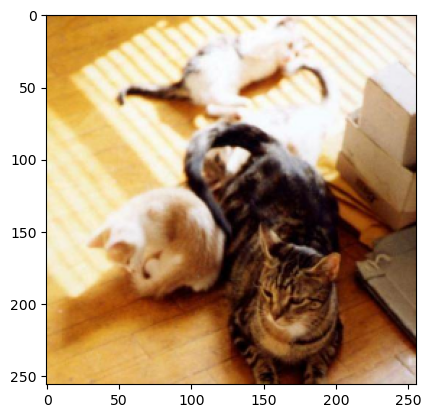

In [31]:
img = batch[0][0]
plt.imshow(img.astype(int))

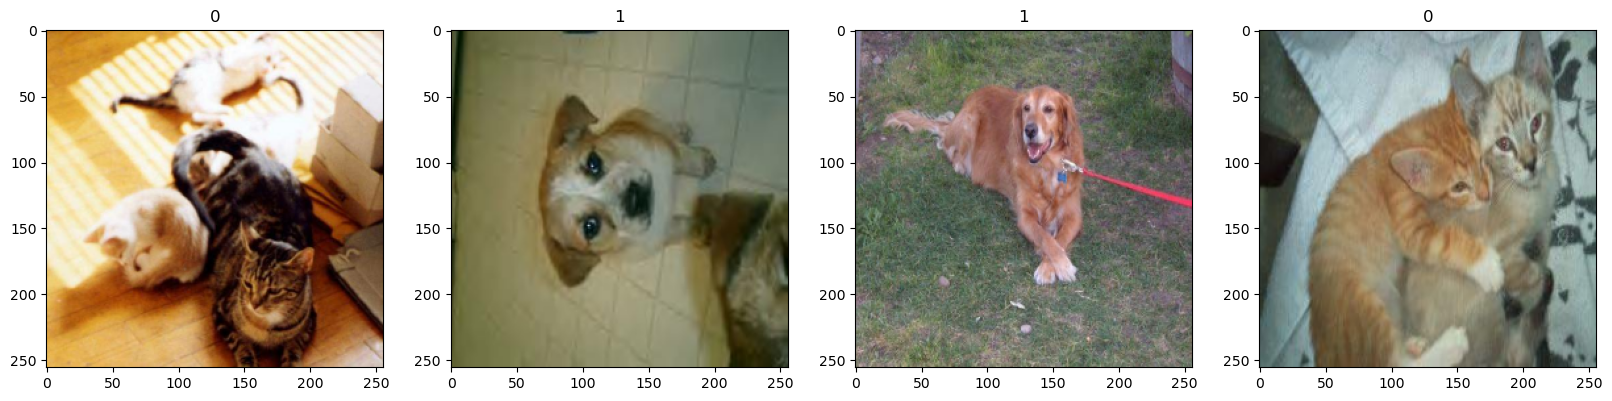

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [236]:
data.map??

Signature: data.map(map_func, num_parallel_calls=None, deterministic=None, name=None) -> 'DatasetV2'
Docstring:
Maps `map_func` across the elements of this dataset.

This transformation applies `map_func` to each element of this dataset, and
returns a new dataset containing the transformed elements, in the same
order as they appeared in the input. `map_func` can be used to change both
the values and the structure of a dataset's elements. Supported structure
constructs are documented
[here](https://www.tensorflow.org/guide/data#dataset_structure).

For example, `map` can be used for adding 1 to each element, or projecting a
subset of element components.

>>> dataset = Dataset.range(1, 6)  # ==> [ 1, 2, 3, 4, 5 ]
>>> dataset = dataset.map(lambda x: x + 1)
>>> list(dataset.as_numpy_iterator())
[2, 3, 4, 5, 6]

The input signature of `map_func` is determined by the structure of each
element in this dataset.

>>> dataset = Dataset.range(5)
>>> # `map_func` takes a single argument of type `t

In [35]:
data = data.map(lambda x,y: (x/255, y))

In [37]:
tf.data.Dataset.as_numpy_iterator??

Signature: tf.data.Dataset.as_numpy_iterator(self)
Source:   
  def as_numpy_iterator(self):
    """Returns an iterator which converts all elements of the dataset to numpy.

    Use `as_numpy_iterator` to inspect the content of your dataset. To see
    element shapes and types, print dataset elements directly instead of using
    `as_numpy_iterator`.

    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> for element in dataset:
    ...   print(element)
    tf.Tensor(1, shape=(), dtype=int32)
    tf.Tensor(2, shape=(), dtype=int32)
    tf.Tensor(3, shape=(), dtype=int32)

    This method requires that you are running in eager mode and the dataset's
    element_spec contains only `TensorSpec` components.

    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> for element in dataset.as_numpy_iterator():
    ...   print(element)
    1
    2
    3

    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> print(list(dataset.as_numpy_iterator(

In [37]:
scaled = data.as_numpy_iterator().next()

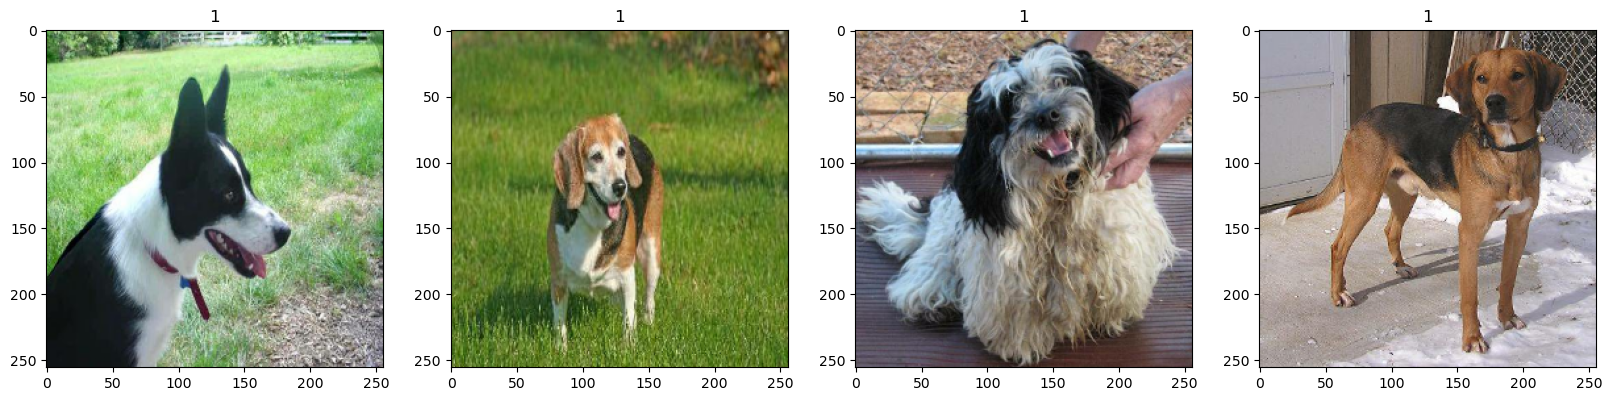

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled[1][idx])

In [40]:
len(data)

782

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [45]:
val_size 

156

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [49]:
len(val)

156

In [51]:
##BUILD CONVOLUTIONAL NEURAL NETWORK

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [55]:
model = Sequential()

In [57]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ugind\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
#model.compile??
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
##TRAINING TIME

In [65]:
 logdir = 'logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
547/547 ━━━━━━━━━━━━━━━━━━━━ 113s 202ms/step - accuracy: 0.5476 - loss: 0.7315 - val_accuracy: 0.6751 - val_loss: 0.6121
Epoch 2/4
547/547 ━━━━━━━━━━━━━━━━━━━━ 111s 202ms/step - accuracy: 0.6995 - loss: 0.5764 - val_accuracy: 0.7420 - val_loss: 0.5089
Epoch 3/4
547/547 ━━━━━━━━━━━━━━━━━━━━ 111s 202ms/step - accuracy: 0.7814 - loss: 0.4636 - val_accuracy: 0.6893 - val_loss: 0.6225
Epoch 4/4
547/547 ━━━━━━━━━━━━━━━━━━━━ 111s 203ms/step - accuracy: 0.8415 - loss: 0.3504 - val_accuracy: 0.7402 - val_loss: 0.6538


In [71]:
hist.history

{'accuracy': [0.5893509984016418,
  0.7189785242080688,
  0.7945041060447693,
  0.858660876750946],
 'loss': [0.6708478927612305,
  0.5466577410697937,
  0.4400479197502136,
  0.3172616958618164],
 'val_accuracy': [0.6750801205635071,
  0.7419871687889099,
  0.6893028616905212,
  0.7401843070983887],
 'val_loss': [0.6121383905410767,
  0.508917510509491,
  0.6225401163101196,
  0.6537616848945618]}

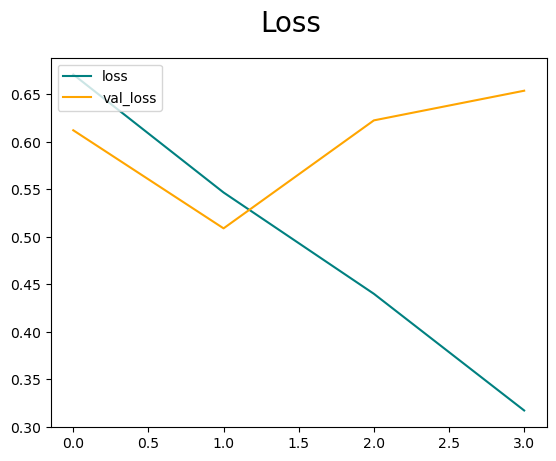

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
##plt.plot??

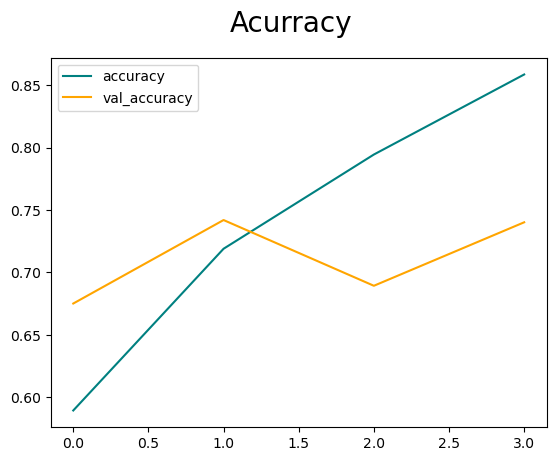

In [77]:
 fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Acurracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [79]:
model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])

547/547 ━━━━━━━━━━━━━━━━━━━━ 113s 205ms/step - accuracy: 0.9193 - loss: 0.2089 - val_accuracy: 0.7226 - val_loss: 0.9444


In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [103]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

In [111]:
print(f'precision: {pre.result().numpy()}, recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

precision: 0.6847222447395325, recall: 0.7806808948516846, Accuracy: 0.7080671191215515


In [119]:
##TEST

In [157]:
dog = cv2.imread('dog.jpg')
cat = cv2.imread('cat.jpg')
#plt.imshow(cv2.cvtColor(dog, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
dog = np.array(dog)
cat = np.array(cat)

numpy.ndarray

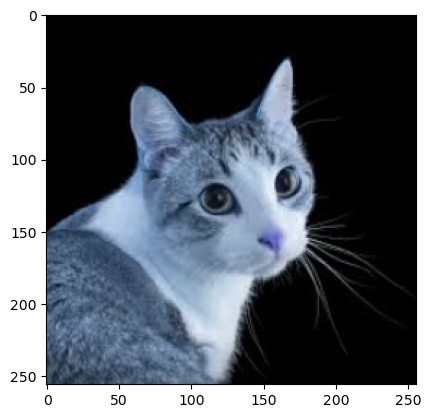

In [231]:
resize_dog = tf.image.resize(dog, (256,256))
resize_cat = tf.image.resize(cat, (256,256))
plt.imshow(resize_cat.numpy().astype(int))

In [209]:
resize_dog.numpy().shape

(256, 256, 3)

In [201]:
np.expand_dims(resize_dog, 0).shape

(1, 256, 256, 3)

In [219]:
yhat = model.predict(np.expand_dims(resize_dog/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [217]:
yhat

array([[0.98042244]], dtype=float32)

In [257]:
yhat = model.predict(np.expand_dims(resize_dog/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [229]:
yhat1[0][0]

array([[0.0853595]], dtype=float32)

In [261]:
if yhat1[0][0] <= 0.5:
    print("Cat")
else:
    print("Dog")

Cat


In [263]:
##Saving Model

In [265]:
from tensorflow.keras.models import load_model

In [269]:
model.save(os.path.join('models', 'dogcatclass.h5'))

In [273]:
new_model = load_model(os.path.join('models', 'dogcatclass.h5'))

In [275]:
new_model.predict(np.expand_dims(resize_dog/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.98042244]], dtype=float32)

In [279]:
new_model.predict(np.expand_dims(resize_dog/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.98042244]], dtype=float32)

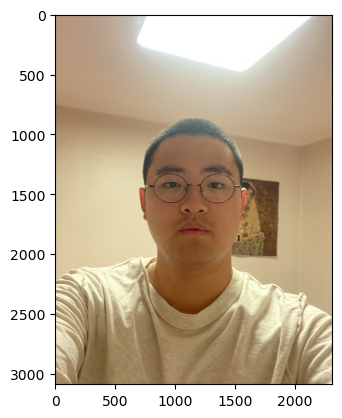

In [287]:
me = cv2.imread('me.jpg')
plt.imshow(cv2.cvtColor(me, cv2.COLOR_BGR2RGB))
plt.show()

In [297]:
resize_me = tf.image.resize(me, (256,256)) 
#m.numpy()


In [313]:
mehat = new_model.predict(np.expand_dims(resize_me/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [315]:
mehat

array([[0.12211572]], dtype=float32)

In [325]:
if mehat[0][0] <= 0.5:
    print("Cat")
else:
    print("Dog")

Cat


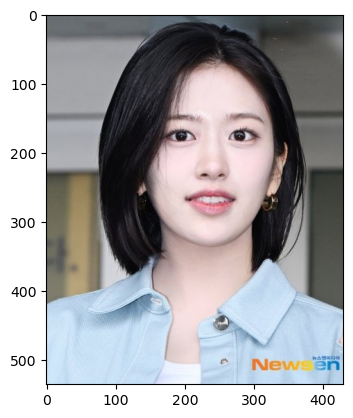

In [307]:
ayj = cv2.imread('dogface.jpg')
plt.imshow(cv2.cvtColor(ayj, cv2.COLOR_BGR2RGB))
plt.show()

In [309]:
resize_ayj = tf.image.resize(ayj, (256,256))

In [319]:
ayjhat = new_model.predict(np.expand_dims(resize_ayj/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [321]:
ayjhat

array([[0.75449955]], dtype=float32)

In [327]:
if ayjhat[0][0] <= 0.5:
    print("Cat")
else:
    print("Dog")

Dog
